In [185]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib inline

In [186]:
df = pd.read_csv("pokemon.csv")

In [239]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [212]:
df.shape

(800, 13)

#### dtype of each column:

In [188]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

#### interesting statistics:

In [248]:
df["Legendary"].corr(df["Generation"], method = "pearson")

0.07979359239925098

In [194]:
pd.crosstab(df["Legendary"],df["Generation"], margins = True, normalize= "all")

Generation,1,2,3,4,5,6,All
Legendary,,,,,,,
False,0.2000,0.12625,0.1775,0.13500,0.18750,0.0925,0.91875
True,0.0075,0.00625,0.0225,0.01625,0.01875,0.0100,0.08125
All,0.2075,0.13250,0.2000,0.15125,0.20625,0.1025,1.00000


In [206]:
leg_gen = pd.crosstab(df["Legendary"],df["Generation"])
leg_gen.div(leg_gen.sum(1), axis=0)

Generation,1,2,3,4,5,6
Legendary,,,,,,
False,0.217687,0.137415,0.193197,0.146939,0.204082,0.100680
True,0.092308,0.076923,0.276923,0.200000,0.230769,0.123077


In [207]:
leg_gen.div(leg_gen.sum(0), axis=1)

Generation,1,2,3,4,5,6
Legendary,,,,,,
False,0.963855,0.95283,0.8875,0.892562,0.909091,0.902439
True,0.036145,0.04717,0.1125,0.107438,0.090909,0.097561


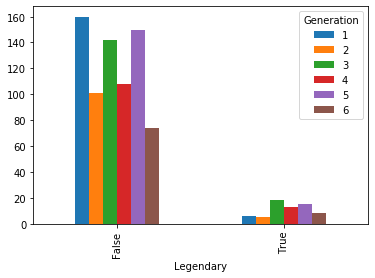

In [223]:
leg_gen.plot.bar()

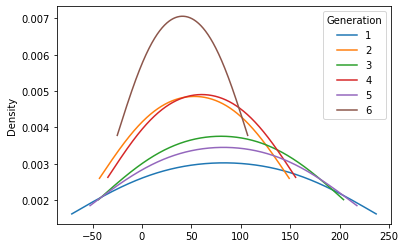

In [211]:
leg_gen.plot.density()

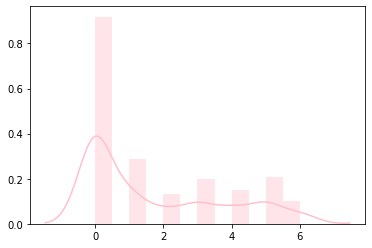

In [236]:
leg_gen = pd.crosstab(df["Legendary"],df["Generation"])
leg_gen_dist = pd.Series(np.concatenate([df["Legendary"], df["Generation"]]))
sns.distplot(leg_gen_dist, color="pink")

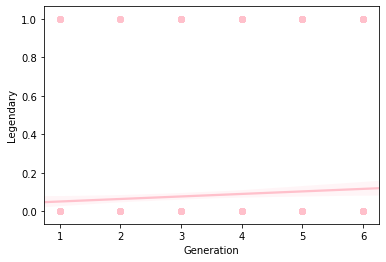

In [234]:
sns.regplot(x = df["Generation"],y = df["Legendary"], scatter=True, color="pink")

In [246]:
df["Total"].describe().round()

count    800.0
mean     435.0
std      120.0
min      180.0
25%      330.0
50%      450.0
75%      515.0
max      780.0
Name: Total, dtype: float64

In [251]:
df["Legendary"].corr(df["Total"], method = "spearman")

0.4438633776780223

In [252]:
df["Legendary"].corr(df["Total"], method = "kendall")

0.36468703135159813

In [253]:
df["Legendary"].corr(df["Total"], method = "pearson")

0.5017583833882711

In [255]:
df["Generation"].corr(df["Total"], method = "pearson")

0.0483840240348962